In [1]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
from antenna import Antenna
import itertools
from tqdm import tqdm

In [2]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]
print(antenna_params)
print(opt_params)

{'N': 10, 'd': 0.5, 'wavelengths': [1, 2], 'beam_resolution': 1}
{'general': {'method': 'trust-constr'}, 'options': {'maxiter': 1000, 'verbose': 3}}


In [12]:
def compute_possible_conf(N, verbose=0, jac=True, hess=True, maxiter=500):
    antenna_params["N"] = N
    opt_params["options"]["verbose"] = verbose
    opt_params["options"]["maxiter"] = maxiter
    antenna = Antenna(antenna_params)
    antenna.set_objective(weights=[1.0, 1.0])
    antenna.set_jacobian(weights=[1.0, 1.0])
    antenna.set_hessian(weights=[1.0, 1.0])
    configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))
    
    values = []
    for cfg in tqdm(configurations):
        antenna.set_configuration(cfg)
        f, _ = antenna.get_optimal_current_allocation(opt_params, 
                                                      x0=-np.ones(antenna.N), 
                                                      cons=False, 
                                                      jac=jac, 
                                                      hess=hess)
        values.append(f)
    return values, configurations

# 3 currents - possible solutions

In [13]:
values3, conf3 = compute_possible_conf(3)
values3_num, _ = compute_possible_conf(3, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values3)}")

  0%|          | 0/8 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 8/8 [00:00<00:00, 15.31it/s]

obj function value for the optimal configuration: 13.230457878770912


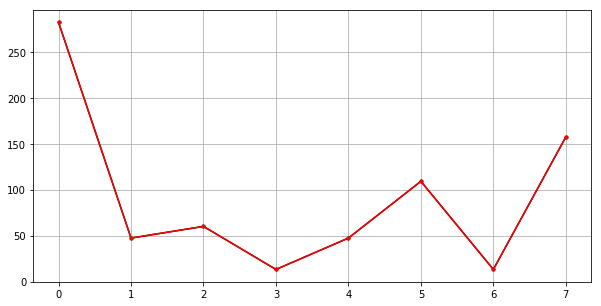

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(values3, '.-k')
plt.plot(values3_num, '.-r')
plt.grid(True)

## 4 currents - possible solutions

In [21]:
values4, conf4 = compute_possible_conf(4, verbose=0)
values4_num, _ = compute_possible_conf(4, jac=False, hess=False, verbose=0)
print(f"obj function value for the optimal configuration: {min(values4)}")

  0%|          | 0/16 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 16/16 [00:01<00:00,  9.05it/s]

obj function value for the optimal configuration: 12.27944153675312


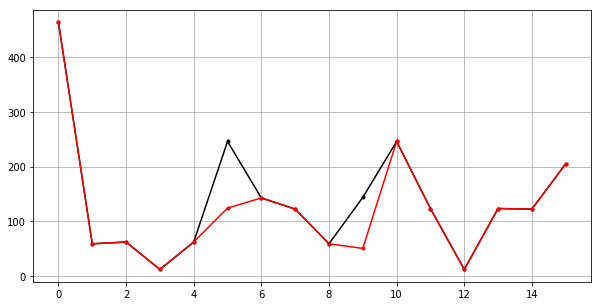

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(values4, '.-k')
plt.plot(values4_num, '.-r')
plt.grid(True)

## 5 currents - possible solutions

In [17]:
values5, conf5 = compute_possible_conf(5)
values5_num, _ = compute_possible_conf(5, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values5)}")

  0%|          | 0/32 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 32/32 [00:08<00:00,  4.28it/s]

obj function value for the optimal configuration: 21.183437768700212


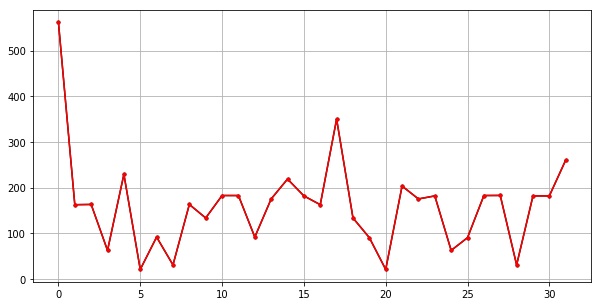

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(values5, '.-k')
plt.plot(values5_num, '.-r')
plt.grid(True)

## 6 currents - possible solutions

In [11]:
values6, conf6 = compute_possible_conf(6)
values6_num, _ = compute_possible_conf(6, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values6)}")

 44%|████▍     | 28/64 [00:10<00:14,  2.43it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 64/64 [00:30<00:00,  2.55it/s]

obj function value for the optimal configuration: 7.133994414852172


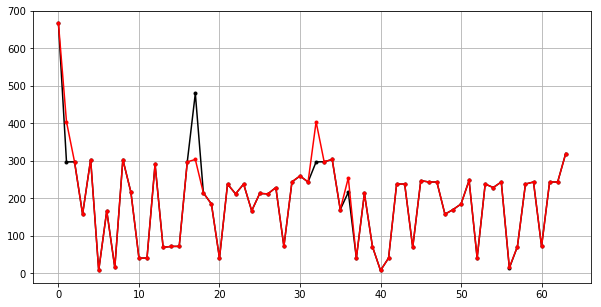

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(values6, '.-k')
plt.plot(values6_num, '.-r')
plt.grid(True)

## 7 currents - possible solutions

In [35]:
values7, conf7 = compute_possible_conf(7)
values7_num, _ = compute_possible_conf(7, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values7)}")

  2%|▏         | 2/128 [00:01<00:59,  2.12it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
 74%|███████▍  | 95/128 [01:25<00:43,  1.31s/it]

KeyboardInterrupt: 

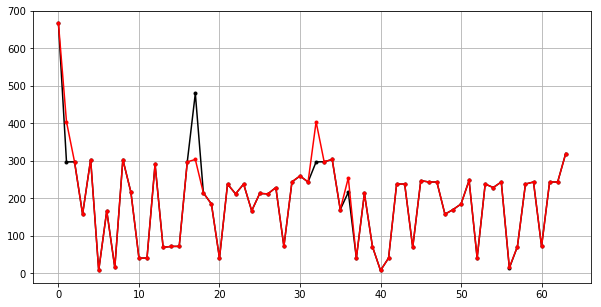

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(values6, '.-k')
plt.plot(values6_num, '.-r')
plt.grid(True)

## 10 currents - possible solutions

In [10]:
values10, conf10 = compute_possible_conf(10)
values10_num, _ = compute_possible_conf(10, jac=False, hess=False)
print(f"obj function value for the optimal configuration: {min(values10)}")

  0%|          | 0/1024 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
100%|██████████| 1024/1024 [21:12<00:00,  1.98s/it]


In [38]:
values = np.array(values)

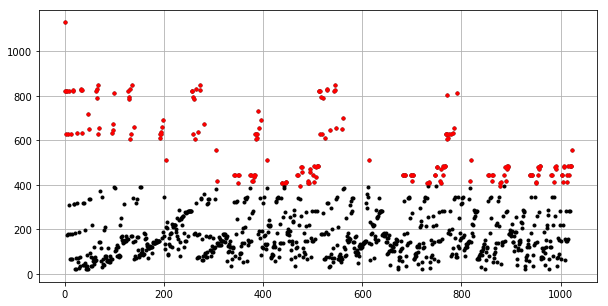

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, values.shape[0]), values, '.k')
plt.plot(idx_max, values[idx_max], '.r')
plt.grid(True)

In [116]:
idx_max = list((-np.array(values)).argsort()[:200])
idx_min = list((np.array(values)).argsort()[:1])
print(idx_min)

[720]


In [94]:
configurations[720]

(1, 0, 1, 1, 0, 1, 0, 0, 0, 0)

In [117]:
cfg_image = []
for i in idx_min:
    cfg_image.append([*configurations[i]])

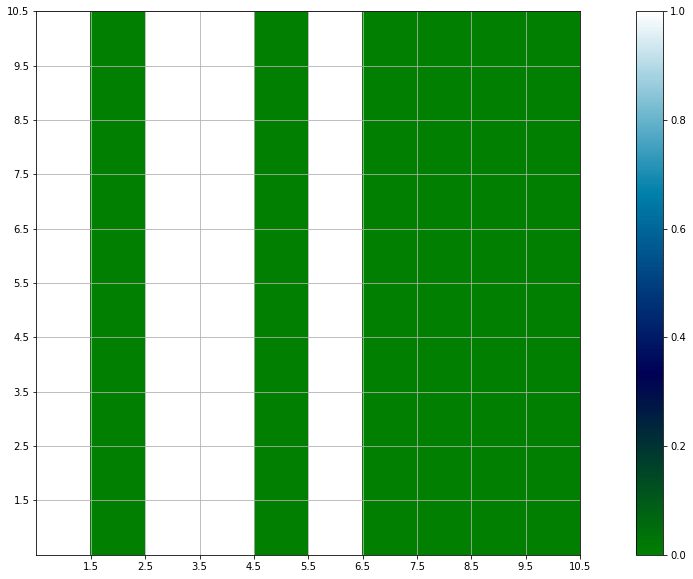

In [118]:
plt.figure(figsize=(20, 10))
plt.imshow(np.array(cfg_image), interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.xticks(np.arange(1.5, 11.5, 1))
plt.yticks(np.arange(1.5, 11.5, 1))
plt.grid(b=True, which='major')
plt.show()

In [56]:
antenna.set_configuration(configurations[720])
antenna.set_allocation_constraint(None)
_, I = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N))
T = antenna.set_currents(I)

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |  21   |   0   | +6.5369e+02 | 1.00e+00 | 2.80e+02 | 0.00e+00 | 1.00e+00 |   0   |
|   2   |  42   |   1   | +1.0671e+02 | 7.00e+00 | 1.92e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   3   |  63   |   3   | +1.0671e+02 | 7.00e-01 | 1.92e+02 | 0.00e+00 | 1.00e+00 |   4   |
|   4   |  84   |   5   | +7.5180e+01 | 1.40e+00 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   5   |  105  |   7   | +7.5180e+01 | 7.00e-01 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   6   |  126  |   9   | +7.5180e+01 | 3.50e-01 | 1.51e+02 | 0.00e+00 | 1.00e+00 |   2   |
|   7   |  147  |  11   | +4.4745e+01 | 7.00e-01 | 5.65e+01 | 0.00e+00 | 1.00e+00 |   2   |
|   8   |  168  |  15   | +4.4164e+01 | 7.00e-01 | 8.84e+01 | 0.00e+00 | 1.00e+00 |   4   |
|   9   |  189  |  19   | +3.3816e+01 | 1.19e+00 | 5.57e+01 | 0.00e+00 | 1.00e+0

In [63]:
antenna.I = np.log(T)

/anaconda3/envs/p-sci/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


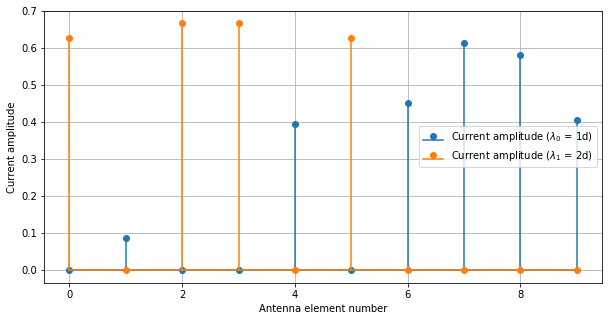

In [64]:
antenna.plot_current_distribution()

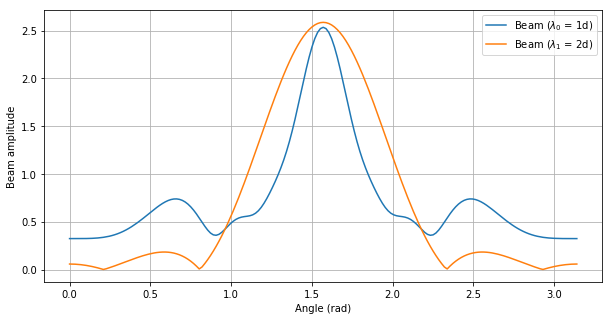

In [65]:
antenna.plot_formed_beams()

In [119]:
antenna_params["number_of_antenna_elements"] = 11
opt_params["options"]["verbose"] = 0
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))

values = []
for cfg in tqdm(configurations):
    antenna.set_configuration(cfg)
    f, _ = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N))
    values.append(f)

  0%|          | 0/2048 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
 47%|████▋     | 966/2048 [23:40<16:29,  1.09it/s]  /anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_trustregion_constr/qp_subproblem.py:308: RuntimeWarning: invalid value encountered in less_equal
  return (lb <= x).all() and (x <= ub).all()
100%|██████████| 2048/2048 [56:07<00:00,  2.26s/it]


In [120]:
values = np.array(values)

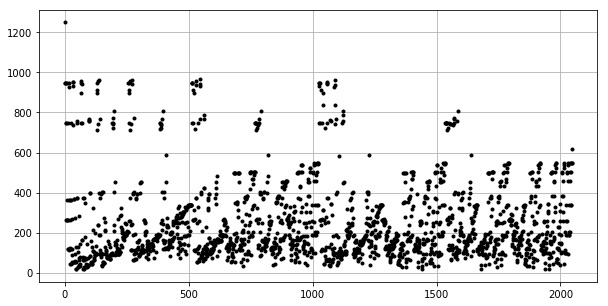

In [121]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, values.shape[0]), values, '.k')
plt.grid(True)

In [128]:
idx_max = list((-np.array(values)).argsort()[:200])
idx_min = list((np.array(values)).argsort()[:2])
print(idx_min)

[45, 1440]


In [129]:
configurations[1440]

(1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0)

In [123]:
cfg_image = []
for i in idx_min:
    cfg_image.append([*configurations[i]])

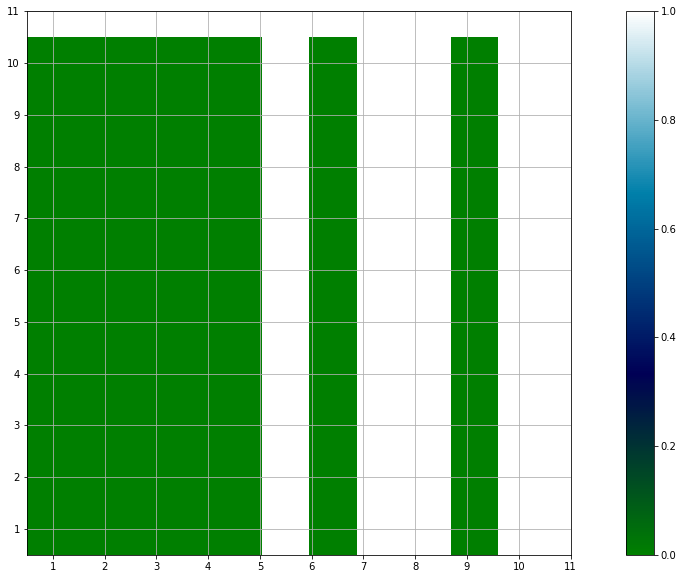

In [126]:
plt.figure(figsize=(20, 10))
plt.imshow(np.array(cfg_image), interpolation='nearest', cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))
plt.colorbar()
plt.xticks(np.arange(1, 12, 1))
plt.yticks(np.arange(1, 12, 1))
plt.grid(b=True, which='major')
plt.show()

In [6]:
antenna_params["N"] = 12
opt_params["options"]["verbose"] = 0
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
configurations = list(itertools.product(np.arange(antenna.n_currents), repeat=antenna.N))

values = []
for cfg in tqdm(configurations):
    antenna.set_configuration(cfg)
    f, _ = antenna.get_optimal_current_allocation(opt_params, x0=-np.ones(antenna.N), cons=False)
    values.append(f)



  0%|          | 0/4096 [00:00<?, ?it/s]/anaconda3/envs/p-sci/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


  0%|          | 1/4096 [00:00<37:18,  1.83it/s]

  0%|          | 2/4096 [00:04<1:54:40,  1.68s/it]

  0%|          | 3/4096 [00:06<1:50:41,  1.62s/it]

  0%|          | 4/4096 [00:06<1:22:29,  1.21s/it]

  0%|          | 5/4096 [00:07<1:13:44,  1.08s/it]

  0%|          | 6/4096 [00:07<1:03:51,  1.07it/s]

  0%|          | 7/4096 [00:08<55:07,  1.24it/s]  

  0%|          | 8/4096 [00:13<2:18:39,  2.04s/it]

  0%|          | 9/4096 [00:18<3:25:43,  3.02s/it]

  0%|          | 10/4096 [00:19<2:34:46,  2.27s/it]

  0%|          | 11/4096 [00:19<1:59:10,  1.75s/it]

  0%|          | 12/4096 [00:20<1:34:18

KeyboardInterrupt: 

In [ ]:
values = np.array(values)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, values.shape[0]), values, '.k')
plt.grid(True)